### Week 6

In [1]:
import pandas as pd
# Loading data csv file
df_countsBicycle = pd.read_csv('http://lti-adx.adelaide.edu.au/python/alliance-common/data/Fremont_Bridge_Bicycle_Counter.csv',
                               index_col='Date', parse_dates=True)
df_countsBicycle.head(2) #displaying two rows

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2018-01-01 00:00:00,28.0,14.0,14.0
2018-01-01 01:00:00,16.0,2.0,14.0


In [2]:
# loading weather data
df_weather = pd.read_csv('http://lti-adx.adelaide.edu.au/python/alliance-common/data/weatherSeatle.csv', index_col='DATE')
df_weather.head(2) # displaying two rows

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT03,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",8.72,NaN,0.0,0.0,0.0,36.0,44,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",7.83,NaN,0.0,0.0,0.0,37.0,44,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# viewing empty values
df_countsBicycle.isnull().sum()

Fremont Bridge Total            2
Fremont Bridge East Sidewalk    2
Fremont Bridge West Sidewalk    2
dtype: int64

In [4]:
# Sum the bicycles that cross the bridge per day. ('Resample' is a method of frequency conversion and resampling 
# of the timeseries. This method operates similarly to grouping by 'd'-> day)
daily_bicycle =  df_countsBicycle.resample('d').sum()
df_countsBicycle.isnull().sum()

Fremont Bridge Total            2
Fremont Bridge East Sidewalk    2
Fremont Bridge West Sidewalk    2
dtype: int64

In [5]:
# We don't need to know in which part of the bridge the bicycle cross, so we remove all the columns except 'Fremont Bridge Total' 
daily_bicycle = daily_bicycle[['Fremont Bridge Total']]
daily_bicycle

,Fremont Bridge Total
Date,
2018-01-01,674.0
2018-01-02,2498.0
2018-01-03,2827.0
2018-01-04,2578.0
2018-01-05,1866.0
...,...
2019-11-26,3329.0
2019-11-27,2576.0
2019-11-28,579.0


In [6]:
# Adding the day of the week and holiday 
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()

# Choose the range of dates
holidays = calendar.holidays('2012','2019')
holidays = pd.DataFrame(holidays)
holidays.rename(columns = {0: "Date"}, inplace = True)
holidays.head()

,Date
0,2012-01-02
1,2012-01-16
2,2012-02-20
3,2012-05-28
4,2012-07-04


In [7]:
# Joining holidays to a holiday column
matched_date = daily_bicycle.merge(holidays, on = "Date")
matched_date["is_holiday"]=[True, True, True,  True, True,  True,  True,  True,  True, True, True,]
matched_date
daily_bicycle = daily_bicycle.merge(matched_date[["Date", "is_holiday"]], how ="left", on = "Date")
daily_bicycle["is_holiday"].fillna(False, inplace = True)
daily_bicycle

,Date,Fremont Bridge Total,is_holiday
0,2018-01-01,674.0,True
1,2018-01-02,2498.0,False
2,2018-01-03,2827.0,False
3,2018-01-04,2578.0,False
4,2018-01-05,1866.0,False
...,...,...,...
694,2019-11-26,3329.0,False
695,2019-11-27,2576.0,False
696,2019-11-28,579.0,False
697,2019-11-29,1857.0,False


In [8]:
# To prevent altering our Series we create a new one to group by day number and plotting 
group_daily = daily_bicycle.copy()
group_daily["day_of_week"] = group_daily.Date.dt.dayofweek
group_daily.set_index("Date", inplace=True)
group_daily.head()

,Fremont Bridge Total,is_holiday,day_of_week
Date,,,
2018-01-01,674.0,True,0
2018-01-02,2498.0,False,1
2018-01-03,2827.0,False,2
2018-01-04,2578.0,False,3
2018-01-05,1866.0,False,4


In [9]:
#  Average per day
day_count_mean = group_daily.groupby('day_of_week')['Fremont Bridge Total'].mean()

# Changing the index to Day name 
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_count_mean.index = days
day_count_mean

Monday       3658.270000
Tuesday      3896.590000
Wednesday    3854.730000
Thursday     3682.780000
Friday       3305.210000
Saturday     1745.490000
Sunday       1649.919192
Name: Fremont Bridge Total, dtype: float64

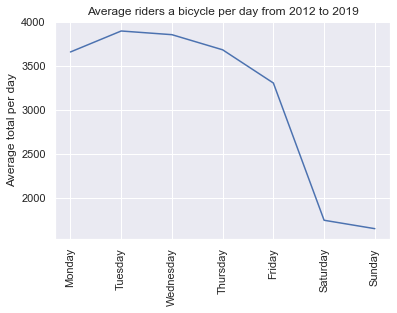

In [10]:
# Plotting 
import matplotlib.pyplot as plt
# For plotting, Seaborns will be used 
import seaborn as sns
# set seaborn up as the default environment 
sns.set()
day_count_mean.plot()
plt.title("Average riders a bicycle per day from 2012 to 2019")
plt.ylabel("Average total per day")
plt.xticks(rotation=90)
plt.show()

In [11]:
# Before modifying daily_bicycle we make a copy to preserve the original 
daily_bicycle_original= daily_bicycle.copy()
daily_bicycle_original.head()

,Date,Fremont Bridge Total,is_holiday
0,2018-01-01,674.0,True
1,2018-01-02,2498.0,False
2,2018-01-03,2827.0,False
3,2018-01-04,2578.0,False
4,2018-01-05,1866.0,False


In [12]:
# one hot-encoding the day of the week 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(len(days)):# Seven days of the week 
    daily_bicycle[days[i]] = (daily_bicycle.Date.dt.dayofweek==i).astype(float)
daily_bicycle.head()

,Date,Fremont Bridge Total,is_holiday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2018-01-01,674.0,True,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-02,2498.0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-03,2827.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2018-01-04,2578.0,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2018-01-05,1866.0,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0


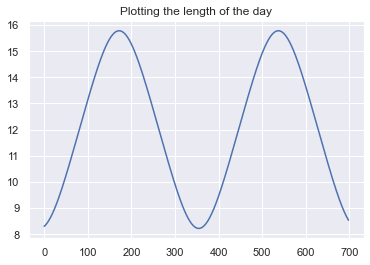

In [13]:
# Get the hours of daylight, we are using an astronomical calculation 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# latitude of Seattle is 47.61
# Function that calculates daylight per day
def get_length_of_day(date, axis = 23.44, latitude=47.61):
    days = (date - pd.datetime(2000,12,21)).days
    m = (1-np.tan(np.radians(latitude))*np.tan(np.radians(axis)
        * np.cos(days * 2 * np.pi/365.25)))
    return 24. * np.degrees(np.arccos(1-np.clip(m,0,2)))/180.

# The function map is used to apply a function (get_length_of_day) to the Date column (daily_bicycle.Date), 
# it is an iterator object, iterating over the entire list/ Series 
daily_bicycle['daylight_hours'] = list(map(get_length_of_day,
                                           daily_bicycle.Date))

# ploting the daylight_hours
plt.title('Plotting the length of the day' )
daily_bicycle['daylight_hours'].plot()
plt.show()

In [14]:
# Date as index, correct type
daily_bicycle.set_index("Date", inplace=True)
daily_bicycle.index = pd.to_datetime(daily_bicycle.index)
daily_bicycle.head(2)

,Fremont Bridge Total,is_holiday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,daylight_hours
Date,,,,,,,,,,
2018-01-01,674.0,True,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.297252
2018-01-02,2498.0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.312353


In [15]:
# The temperatures were 1/10 degrees C; converting to C
df_weather.TMIN = df_weather.TMIN/10
df_weather.TMAX = df_weather.TMAX/10
df_weather['tempC'] = 0.5 * (df_weather.TMIN + df_weather.TMAX )
df_weather['tempC'].astype(int)

# Also converting the precipitation from millimetres to inches 
df_weather.PRCP = df_weather.PRCP/254

# Adding to the df_weather if it is dry or not 
df_weather['dry_day'] = (df_weather['PRCP'] == 0).astype(int)

# date as index, correct type
df_weather.index = pd.to_datetime(df_weather.index)
df_weather.index.names =["Date"]
df_weather.head()

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT05,WT08,WT09,WT13,WT14,WT16,WT18,WT22,tempC,dry_day
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",8.72,NaN,0.000000,0.0,0.0,36.0,4.4,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,1
2018-01-02,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",7.83,NaN,0.000000,0.0,0.0,37.0,4.4,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.90,1
2018-01-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",8.72,NaN,0.000000,0.0,0.0,39.0,4.9,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.10,1
2018-01-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2.68,NaN,0.000512,0.0,0.0,41.0,4.7,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.10,0
2018-01-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",6.49,NaN,0.002008,0.0,0.0,46.0,5.1,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.80,0


In [16]:
# Join the tempC, PRCP and dry_day to the data
daily_bicycle = daily_bicycle.join(df_weather[['tempC','PRCP','dry_day']], lsuffix="_l", rsuffix = "_r")

# Adding a counter that increases from  day  1, and  measures  how  many  years have  passed
daily_bicycle['annual_counter'] = (daily_bicycle.index - daily_bicycle.index[0]).days/365
daily_bicycle.head()

,Fremont Bridge Total,is_holiday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,daylight_hours,tempC,PRCP,dry_day,annual_counter
Date,,,,,,,,,,,,,,
2018-01-01,674.0,True,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.297252,3.75,0.000000,1,0.000000
2018-01-02,2498.0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.312353,3.90,0.000000,1,0.002740
2018-01-03,2827.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.328740,4.10,0.000000,1,0.005479
2018-01-04,2578.0,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.346399,4.10,0.000512,0,0.008219
2018-01-05,1866.0,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.365315,4.80,0.002008,0,0.010959


In [17]:
# Checking all is right in the world
daily_bicycle.isnull().sum()

Fremont Bridge Total    0
is_holiday              0
Monday                  0
Tuesday                 0
Wednesday               0
Thursday                0
Friday                  0
Saturday                0
Sunday                  0
daylight_hours          0
tempC                   0
PRCP                    0
dry_day                 0
annual_counter          0
dtype: int64

In [18]:
# Separating the data into predictors and outcome variable
features_name = daily_bicycle.columns [1:] #all the columns except 'total'
X = daily_bicycle[features_name]
y = daily_bicycle['Fremont Bridge Total']
print('shape of X and y')
X.shape, y.shape

shape of X and y


((699, 13), (699,))

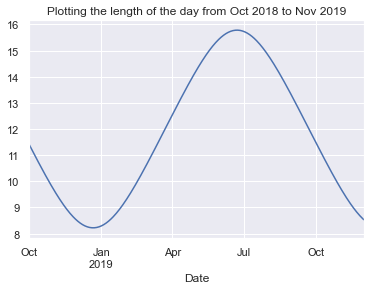

In [19]:
# Practice task 
weekly_bicycle = daily_bicycle.loc['2018-10-1':'2019-11-30'].copy()
weekly_bicycle.head(2)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.title('Plotting the length of the day from Oct 2018 to Nov 2019' )
weekly_bicycle['daylight_hours'].plot()
plt.show()

In [20]:
# Splitting data into test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

print('Training dataset: X_train=', X_train.shape, ', y_train', y_train.shape)
print('Testing dataset: X_test=', X_test.shape, ', y_test', y_test.shape)

Training dataset: X_train= (524, 13) , y_train (524,)
Testing dataset: X_test= (175, 13) , y_test (175,)


In [21]:
# Modelling
from sklearn.svm import SVR
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_linear = SVR(kernel='linear', C=100, gamma='auto')
#svr_rbf = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# Training the models 
svr_linear.fit(X_train, y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [22]:
baseline = np.mean(y)
# Getting an array with baselinematching the number of instances in the testing dataset 
y_baseline = np.repeat(baseline, len(y_test))

# Importing the metric function for RMSE 
from sklearn.metrics import mean_squared_error
naive_RSME = mean_squared_error(y_test, y_baseline)
naive_RSME=np.sqrt(naive_RSME)
print('baseline', baseline, '\n\n naive_RSME')
naive_RSME

baseline 3115.3776824034335 

 naive_RSME


1473.5720080268206

Model SVR
The naive RMSE baseline is  1473.5720080268206
The model performance in training is  657.5363389989516
The model performance in testing is  534.300530322092


[]

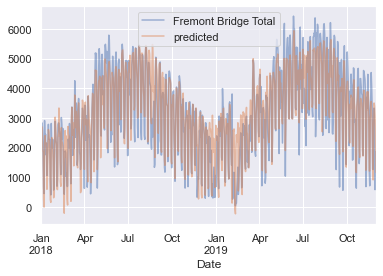

In [32]:
# predicting y with the training set
print('Model SVR')
y_rbf_train_predict = svr_linear.predict(X_train)
# Predicting y with the test set 
y_rbf_test_predict = svr_linear.predict(X_test) # 4.22
RMSE_training = np.sqrt(mean_squared_error(y_train, y_rbf_train_predict))
RMSE_test=np.sqrt(mean_squared_error(y_test, y_rbf_test_predict))
print('The naive RMSE baseline is ', naive_RSME)
print('The model performance in training is ', RMSE_training)
print('The model performance in testing is ', RMSE_test)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
daily_bicycle['predicted'] = svr_linear.predict(X)
daily_bicycle[['Fremont Bridge Total', 'predicted']].plot(alpha=0.5)
plt.plot()

In [24]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators=1000, random_state=0)#1000 forest 

# Fit or training the models 
rfr_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

Model SVR
The naive RMSE baseline is  1473.5720080268206
The model performance in training is  203.2461159786585
The model performance in testing is  465.62440675180005


[]

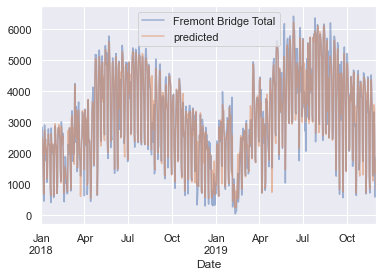

In [25]:
# Predicting y with the training dataset
print('Model SVR')
y_rfr_train_predict = rfr_model.predict(X_train)
# Predicting y with the testing dataset 
y_rfr_test_predict = rfr_model.predict(X_test)#4.22
RMSE_training = np.sqrt(mean_squared_error(y_train, y_rfr_train_predict))
RMSE_test=np.sqrt(mean_squared_error(y_test, y_rfr_test_predict))
print('The naive RMSE baseline is ', naive_RSME)
print('The model performance in training is ', RMSE_training)
print('The model performance in testing is ', RMSE_test)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
daily_bicycle['predicted'] = rfr_model.predict(X)
daily_bicycle[['Fremont Bridge Total', 'predicted']].plot(alpha=0.5)
plt.plot()

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Fit or training the models 
lr_model.fit(X_train, y_train)

LinearRegression()

Model SVR
The naive RMSE baseline is  1473.5720080268206
The model performance in training is  620.9299200786309
The model performance in testing is  527.2218670947337


[]

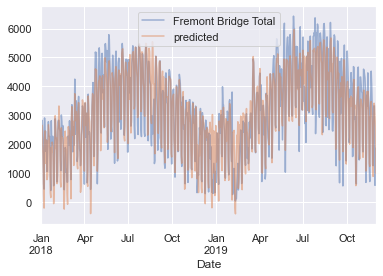

In [33]:
# Predicting y with the training dataset
print('Model SVR')
y_lr_train_predict = lr_model.predict(X_train)
# Prediction y with the testing dataset 
y_lr_test_predict = lr_model.predict(X_test)#4.22
RMSE_training = np.sqrt(mean_squared_error(y_train, y_lr_train_predict))
RMSE_test=np.sqrt(mean_squared_error(y_test, y_lr_test_predict))
print('The naive RMSE baseline is ', naive_RSME)
print('The model performance in training is ', RMSE_training)
print('The model performance in testing is ', RMSE_test)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
daily_bicycle['predicted'] = lr_model.predict(X)
daily_bicycle[['Fremont Bridge Total', 'predicted']].plot(alpha=0.5)
plt.plot()